In [50]:
import pandas
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import r2_score, mean_squared_error
import warnings; warnings.simplefilter('ignore')
import seaborn as sns

In [51]:
#Read dataset 
features = pandas.read_csv("data/train_features.csv", parse_dates=[3])
labels = pandas.read_csv("data/train_labels.csv")

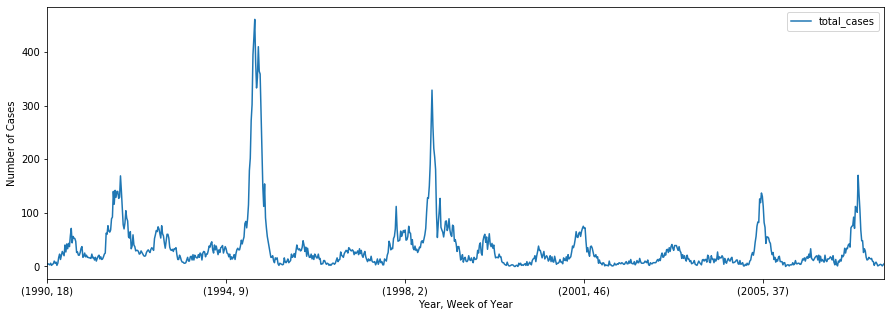

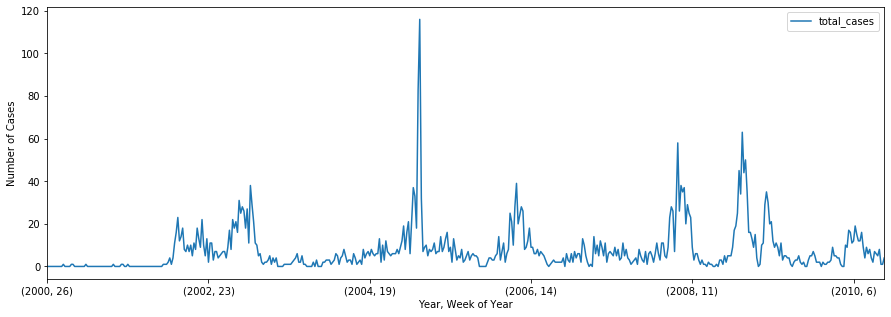

In [52]:
#Data Analysis

#Plot Number of cases Vs WeekOfTheYear 
cityDataSetLabeled = {"sj":[],"iq":[]}
cityDataSetLabeled["sj"] = labels[labels["city"] == "sj"]
cityDataSetLabeled["iq"] = labels[labels["city"] == "iq"]

for city in cityDataSetLabeled:
    count_year = cityDataSetLabeled[city].set_index(['year', 'weekofyear'])
    count_year.plot(figsize = (15,5))
    plt.xlabel("Year, Week of Year")
    plt.ylabel("Number of Cases")

In [53]:
#Data Cleaning

#segregate data based on city and use forward filling for handling missing values
data_train = {"sj":[],"iq":[]}

data_train["sj"] = features[features["city"] == "sj"].fillna(method = 'ffill')
data_train["iq"] = features[features["city"] == "iq"].fillna(method = 'ffill')

for city in data_train:
    data_train[city].set_index('week_start_date')
    data_train[city].drop(['city', 'year'], axis = 1, inplace = True)

# ARIMA

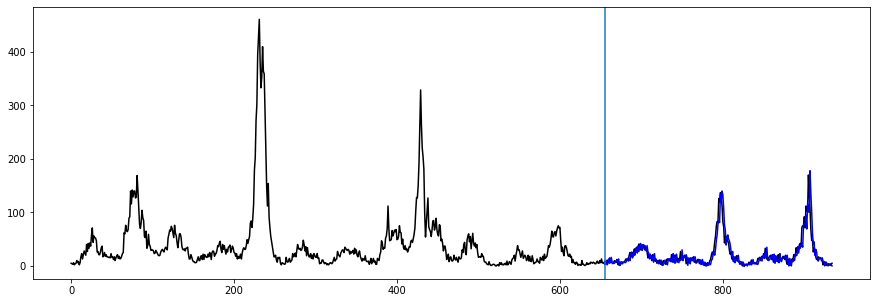

In [54]:
source = []

for entry in cityDataSetLabeled["sj"]["total_cases"]:
    source.append(int(entry))
    
N = len(source)
forecasts = []
start = int(0.7*N)
for k in range(start, N-1):
    model = ARIMA(source[:k], order=(2,1,2))
    fitted = model.fit(start_ar_lags=5)

    forecasts.append(int(fitted.forecast()[0][0]))

offset = N - start - len(forecasts)

plt.rcParams["figure.figsize"]=(15,5)
fig, ax1 = plt.subplots()

ax1.plot(list(range(0, N-1)), source[offset:], color='k')
ax1.plot(list(range(start, N-1)), forecasts, color='b')

ax1.axvline(x=start)


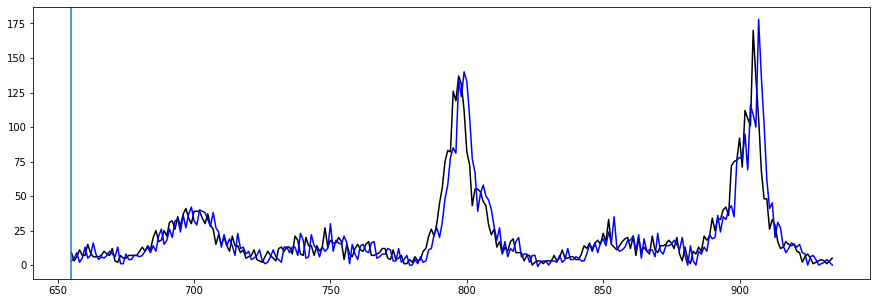

In [57]:
#ZOOMING IN to see clearly
plt.rcParams["figure.figsize"]=(15,5)
fig, ax1 = plt.subplots()
ax1.plot(list(range(start, N-1)), source[start+offset:], color='k')
ax1.plot(list(range(start, N-1)), forecasts, color='b')

ax1.axvline(x=start)

# print('r^2:', r2_score(source[(start+offset):], forecasts))
# print('MSE:', mean_squared_error(source[(start+offset):], forecasts) )
# print(source[(start+offset):], forecasts)

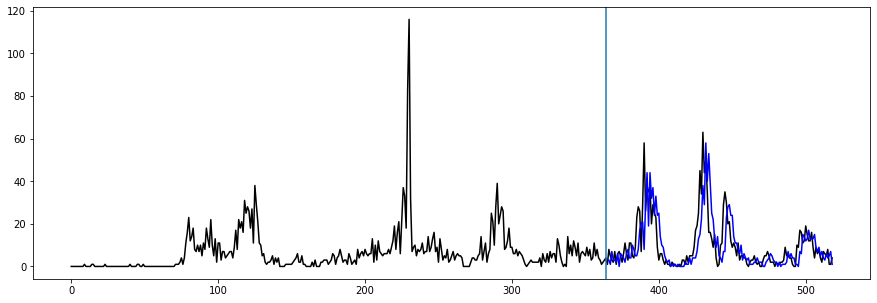

In [58]:
source = []

for entry in cityDataSetLabeled["iq"]["total_cases"]:
    source.append(int(entry))
    
N = len(source)
forecasts = []
start = int(0.7*N)
for k in range(start, N-1):
    model = ARIMA(source[:k], order=(2,1,2))
    fitted = model.fit(start_ar_lags=5)

    forecasts.append(int(fitted.forecast()[0][0]))

offset = N - start - len(forecasts)

plt.rcParams["figure.figsize"]=(15,5)
fig, ax1 = plt.subplots()

ax1.plot(list(range(0, N-1)), source[offset:], color='k')
ax1.plot(list(range(start, N-1)), forecasts, color='b')

ax1.axvline(x=start)

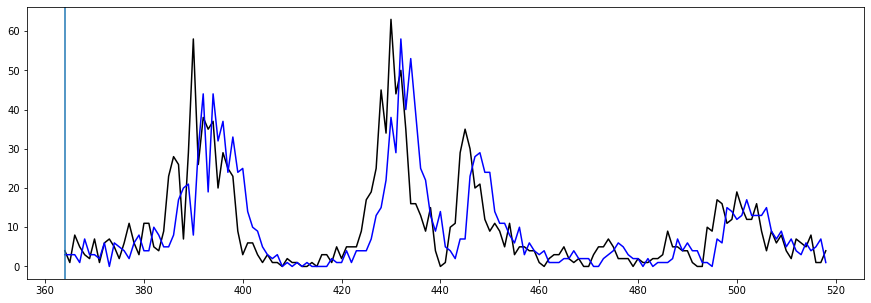

In [59]:
#ZOOMING IN to see clearly
plt.rcParams["figure.figsize"]=(15,5)
fig, ax1 = plt.subplots()
ax1.plot(list(range(start, N-1)), source[start+offset:], color='k')
ax1.plot(list(range(start, N-1)), forecasts, color='b')

ax1.axvline(x=start)

# print('r^2:', r2_score(source[(start+offset):], forecasts))
# print('MSE:', mean_squared_error(source[(start+offset):], forecasts) )
# print(source[(start+offset):], nowcasts)

# SARIMA

In [6]:

seasonal_ordr = (1,1,1,12) #52 weeks

source = []

for entry in cityDataSetLabeled["iq"]["total_cases"]:
    source.append(int(entry))
    


In [7]:
N = len(source)
forecasts = []
start = int(0.7*N)
for k in range(start, N-1):
    model = SARIMAX(source[:k], order=(2,1,2), seasonal_order=seasonal_ordr)
    fitted = model.fit()

    forecasts.append(int(fitted.forecast()))



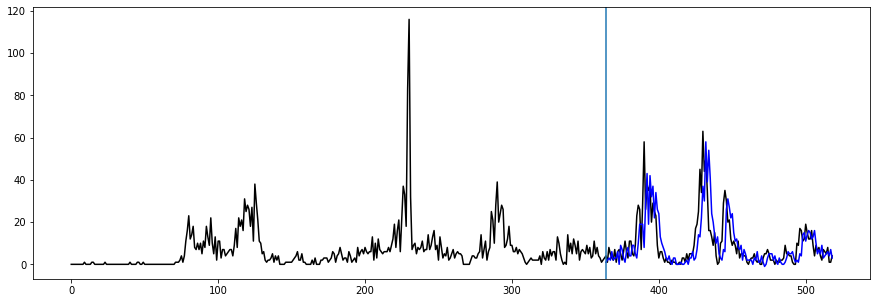

In [8]:
offset = N - start - len(forecasts)

plt.rcParams["figure.figsize"]=(15,5)
fig, ax1 = plt.subplots()

ax1.plot(list(range(0, N-1)), source[offset:], color='k')
ax1.plot(list(range(start, N-1)), forecasts, color='b')

ax1.axvline(x=start)

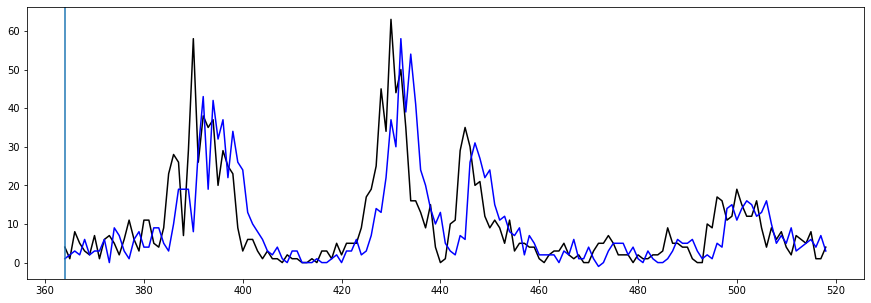

In [15]:
#ZOOMING IN to see clearly
plt.rcParams["figure.figsize"]=(15,5)
fig, ax1 = plt.subplots()
ax1.plot(list(range(start, N-1)), source[start+offset:], color='k')
ax1.plot(list(range(start, N-1)), forecasts, color='b')

ax1.axvline(x=start)

# print('r^2:', r2_score(source[(start+offset):], forecasts))
# print('MSE:', mean_squared_error(source[(start+offset):], forecasts) )


In [60]:
seasonal_ordr = (1,1,1,12) #52 weeks

source = []

for entry in cityDataSetLabeled["sj"]["total_cases"]:
    source.append(int(entry))

In [61]:
N = len(source)
forecasts = []
start = int(0.7*N)
for k in range(start, N-1):
    model = SARIMAX(source[:k]3e, order=(2,1,2), seasonal_order=seasonal_ordr)
    fitted = model.fit()

    forecasts.append(int(fitted.forecast()))



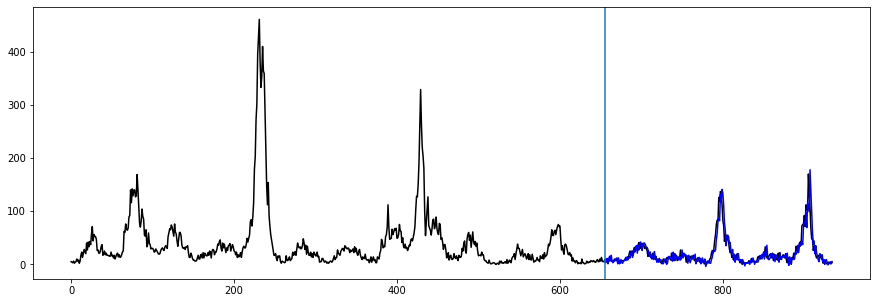

In [62]:
offset = N - start - len(forecasts)

plt.rcParams["figure.figsize"]=(15,5)
fig, ax1 = plt.subplots()

ax1.plot(list(range(0, N-1)), source[offset:], color='k')
ax1.plot(list(range(start, N-1)), forecasts, color='b')


ax1.axvline(x=start)

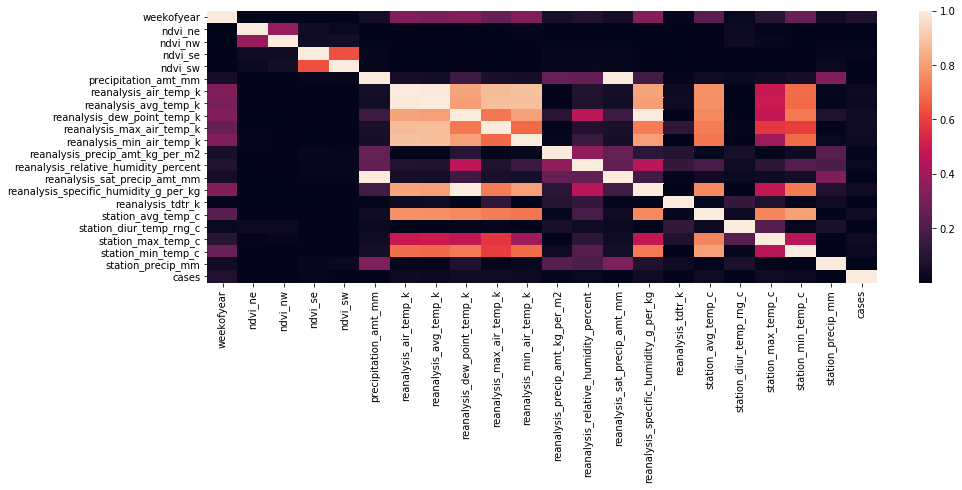

In [64]:
# print(data_train["sj"])
val = []
for entry in cityDataSetLabeled["sj"]["total_cases"]:
    val.append( int(entry))
data_train["sj"]["cases"] = val    
# print(len(val))/
sns.heatmap(data_train["sj"].corr()**2)